0.0


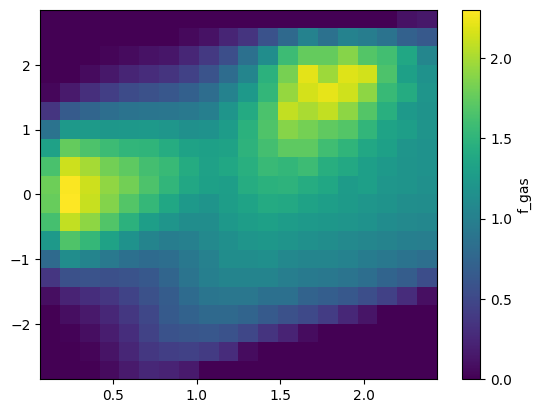

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/2d_fgas_H.hdf5",'r')
hdm=np.array(f['Ndm'])
hg=np.array(f['Ng'])
hs=np.array(f['Ns'])
bin=np.array(f['bin'])
binv=np.array(f['binv'])
hg_T=np.array(f['Ng_T'])
#hg_X=np.array(f['Ng_Xray'])
hg_S=np.array(f['Ng_S'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/c_z_half.hdf5",'r')

zh_ad=np.array(f["z_half"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/c_z_half.hdf5",'r')

zh=np.array(f["z_half"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/2d_fgas_H.hdf5",'r')
hdm_ad=np.array(f['Ndm'])
hg_ad=np.array(f['Ng'])
hg_T_ad=np.array(f['Ng_T'])
#hg_X_ad=np.array(f['Ng_Xray'])
hg_S_ad=np.array(f['Ng_S'])
f.close()
f=h5py.File('/Users/24756376/data/Flamingo/L1000N1800_NoCool/halos_ranked.hdf5','r')

r50=np.array(f["r50"])
r50=r50[r50>0]
f.close()

#hdm+=10**-10
#hdm_ad+=10**-10
#hg=hg+10**-10
#hg_ad=hg_ad+10**-10
f_ad=hg_ad*8.56/(hdm_ad*45.2+hg_ad*8.56+10**-10)/(0.0494/0.316)
f=(hg*8.56+hs*6.52)/(hdm*45.2+hg*8.56+10**-10+hs*6.52)/(0.0494/0.316)

print(np.min(hdm_ad))
v_m=np.percentile(f[9000:10000],50,axis=0)
v_ad_m=np.percentile(f_ad[9000:10000],50,axis=0)
plt.figure()
plt.imshow(v_ad_m.T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='f_gas')


In [42]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/flamingo_0077.0.hdf5",'r')
dm=len(f['PartType1']["Coordinates"])
g=len(f['PartType0']["Coordinates"])
s=len(f['PartType4']["Coordinates"])
mass_g=np.array(f['PartType0']["Masses"])
mass_dm=np.array(f['PartType1']["Masses"])
mass_s=np.array(f['PartType4']["Masses"])
f.close()
print((g*1.107+s*0.745)/(dm*5.65+g*1.107+s*0.745)/(0.0494/0.316))
print((np.sum(mass_g)+np.sum(mass_s))/(np.sum(mass_dm)+np.sum(mass_g)+np.sum(mass_s))/(0.0494/0.316))


1.0175846979212169
1.0173359


-1.0 1.4000000000000001
[0.89036745 1.27820389 1.2038845  1.08916325 0.953505   0.85831033
 0.87763059 0.91326687 1.11743761 1.29093956 1.00554773 1.13668822
 1.23576542 1.17444574 1.22374429 1.17721261 1.02033896 1.04810473
 1.08654803 1.0772454 ]
659685516.0 799260106.0


Text(0.5, 1.0, 'M>10^14 halos stacked')

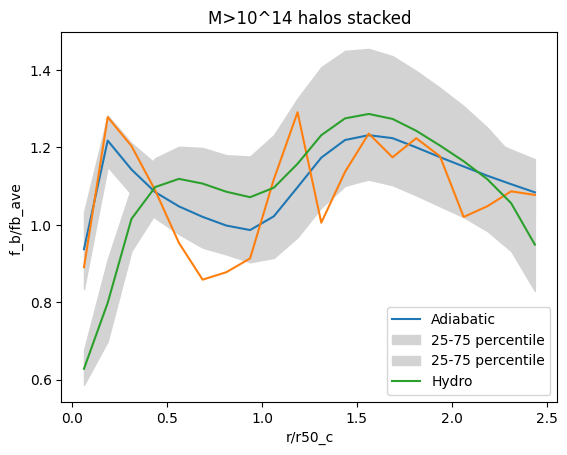

In [16]:
bins=np.linspace(0,2,21)
hist=np.sum(hg_ad,axis=2)*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)
print(np.min(zh),np.max(zh))
per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)
print(hist[0])
ax.plot(bin,per[1],label='Adiabatic')
ax.plot(bin,hist[0])
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')
hist=(np.sum(hg,axis=2)*8.56+np.sum(hs,axis=2)*6.32)/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56+np.sum(hs,axis=2)*6.32)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1],label='Hydro')
ax.legend()
#ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50_c')
ax.set_ylabel('f_b/fb_ave ')
ax.set_title('M>10^14 halos stacked')

[57149. 80499. 75269. 69182. 65736. 62625. 46727. 37831. 27435. 22804.
 39205. 28460. 24112. 25013. 20081. 23134. 34109. 33406. 26578. 24106.]


Text(0.5, 1.0, 'M>10^14 halos stacked')

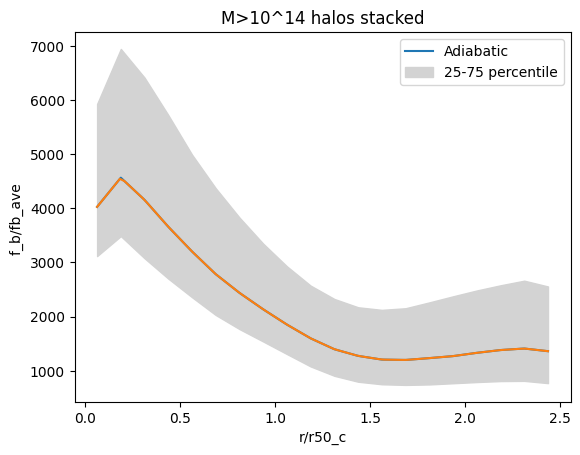

In [27]:
from scipy.interpolate import interp1d
hist=np.sum(hdm_ad,axis=2)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)
print(hist[0])
ax.plot(bin,per[1],label='Adiabatic')
f=interp1d(bin,per[1])
ax.plot(np.linspace(bin[0],bin[-1],100),f(np.linspace(bin[0],bin[-1],100)))
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')



ax.legend()
#ax.set_yscale('log')

ax.set_xlabel('r/r50_c')
ax.set_ylabel('f_b/fb_ave ')
ax.set_title('M>10^14 halos stacked')

[0.0625 0.1875 0.3125 0.4375 0.5625 0.6875 0.8125 0.9375 1.0625 1.1875
 1.3125 1.4375 1.5625 1.6875 1.8125 1.9375 2.0625 2.1875 2.3125 2.4375]


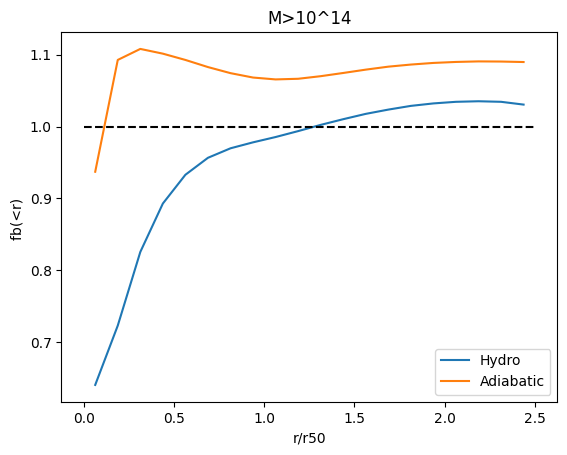

In [39]:
hga=np.cumsum(np.sum(hg,axis=2),axis=1)
hdma=np.cumsum(np.sum(hdm,axis=2),axis=1)
hsa=np.cumsum(np.sum(hs,axis=2),axis=1)
hga_ad=np.cumsum(np.sum(hg_ad,axis=2),axis=1)
hdma_ad=np.cumsum(np.sum(hdm_ad,axis=2),axis=1)
h_accu=(hga*8.56+hsa*6.54)/(hdma*45.2+hga*8.56+hsa*6.54)/(0.0494/0.316)
per=np.percentile(h_accu,[25,50,75],axis=0)

h_accu_ad=(hga_ad*8.56)/(hdma_ad*45.2+hga_ad*8.56)/(0.0494/0.316)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(bin,per[1],label='Hydro')
per=np.percentile(h_accu_ad,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Adiabatic')
ax.hlines(1,0,2.5,color='k',linestyles='dashed')
ax.legend()
ax.set_title('M>10^14')
ax.set_xlabel('r/r50')
ax.set_ylabel('fb(<r) ')
print(bin)

0.9375


-1.0 1.4000000000000001
-1.0 1.4000000000000001


Text(0, 0.5, 'f_b/fb_ave ')

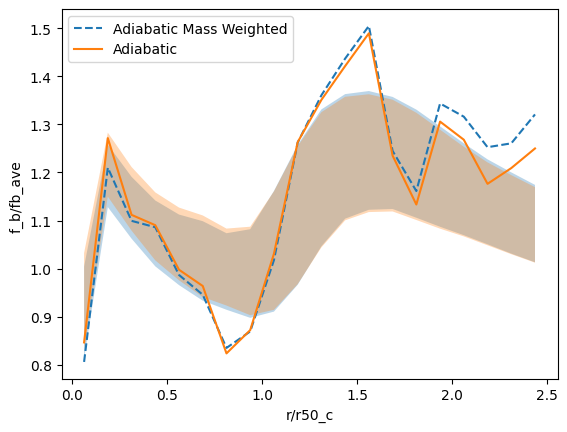

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/2d_fgas_H.hdf5",'r')
hdm_m=np.array(f['Mdm'])
hg_m=np.array(f['Mg'])
hdm_n=np.array(f['Ndm'])
hg_n=np.array(f['Ng'])
f.close()
#hist=np.sum(hg_m[0],axis=1)/(np.sum(hdm_m[0],axis=1)+np.sum(hg_m[0],axis=1))/(0.0494/0.316)
hist=np.sum(hg_m,axis=2)/(np.sum(hdm_m,axis=2)+np.sum(hg_m,axis=2))/(0.0494/0.316)
print(np.min(zh),np.max(zh))
per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,hist[-1],linestyle="dashed",label='Adiabatic Mass Weighted')
ax.fill_between(bin,per[0],per[2],alpha=0.3)

hist=np.sum(hg_n,axis=2)*8.56/(np.sum(hdm_n,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)
print(np.min(zh),np.max(zh))
per=np.percentile(hist,[25,50,75],axis=0)

ax.plot(bin,hist[-1],label='Adiabatic')
ax.fill_between(bin,per[0],per[2],alpha=0.3)
ax.legend()
ax.set_xlabel('r/r50_c')
ax.set_ylabel('f_b/fb_ave ')

Text(0, 0.5, 'fb(<r) ')

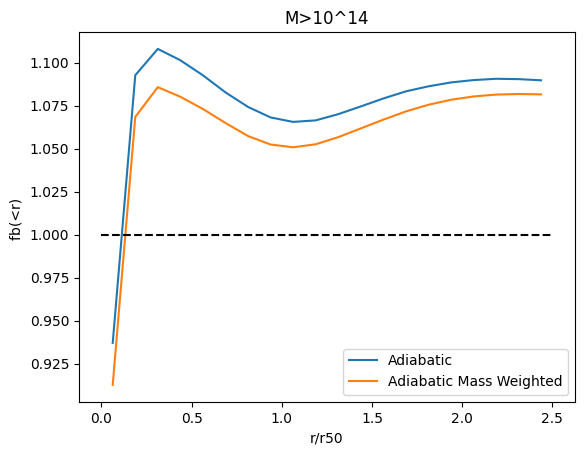

In [5]:
hga=np.cumsum(np.sum(hg_n,axis=2),axis=1)
hdma=np.cumsum(np.sum(hdm_n,axis=2),axis=1)
hsa=0#np.cumsum(np.sum(hs,axis=2),axis=1)
hga_ad=np.cumsum(np.sum(hg_m,axis=2),axis=1)
hdma_ad=np.cumsum(np.sum(hdm_m,axis=2),axis=1)
h_accu=(hga*8.56+hsa*6.54)/(hdma*45.2+hga*8.56+hsa*6.54)/(0.0494/0.316)
per=np.percentile(h_accu,[25,50,75],axis=0)

h_accu_ad=(hga_ad)/(hdma_ad+hga_ad)/(0.0494/0.316)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(bin,per[1],label='Adiabatic')
per=np.percentile(h_accu_ad,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Adiabatic Mass Weighted')
ax.hlines(1,0,2.5,color='k',linestyles='dashed')
ax.legend()
ax.set_title('M>10^14')
ax.set_xlabel('r/r50')
ax.set_ylabel('fb(<r) ')

11904
[0.96750813 1.3843431  1.13647001 1.03817406 1.12202599 1.03356163
 1.44655669 0.92353933 0.91343192 0.82147281 0.91052914 1.11601971
 0.90645491 1.36950742 1.29269605 1.38690932 1.12967927 1.17993875
 0.99554533 1.08427944]
(11091, 20)
659685516.0 799260106.0


Text(0, 0.5, 'fgas ')

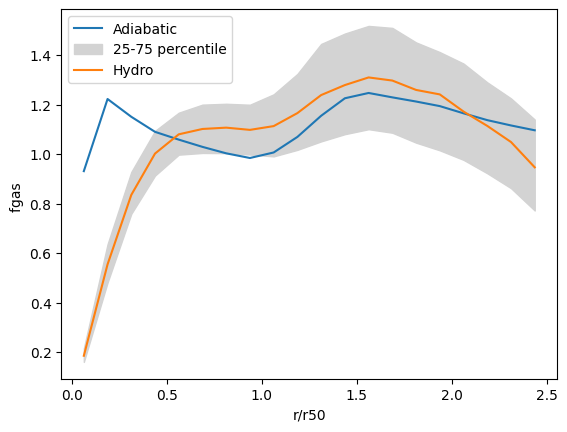

In [22]:
#Narrow Mass Bin
print(len(hg_ad))


bins=np.linspace(0,2,21)
hist=np.sum(hg_ad,axis=2)*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)

hist=hist[10904:11904]
per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)
print(hist[0])
ax.plot(bin,per[1],label='Adiabatic')
hist=np.sum(hg,axis=2)*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
print(hist.shape)
hist=hist[10091:11091]
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1],label='Hydro')
ax.legend()
#ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50')
ax.set_ylabel('fgas ')

1601 1490


Text(0.5, 1.0, 'Medium entropy profile of M>10^14 halos in L1000N1800')

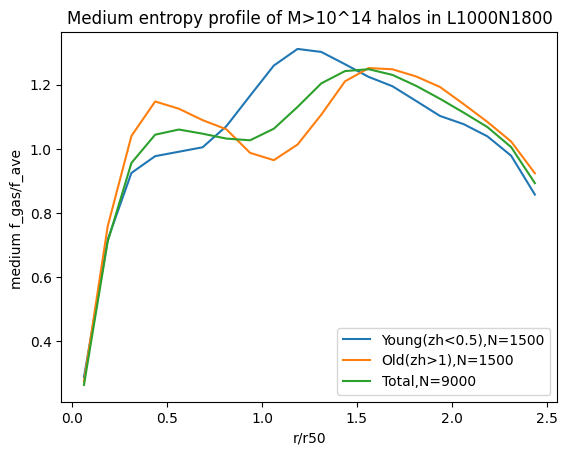

In [28]:
bins=np.linspace(0,2,21)
hist=np.sum(hg[(zh>0)*(zh<0.5)],axis=2)*8.56/(np.sum(hdm[(zh>0)*(zh<0.5)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh<0.5)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Young(zh<0.5),N=1500')
hist=np.sum(hg[(zh>0)*(zh>1)],axis=2)*8.56/(np.sum(hdm[(zh>0)*(zh>1)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh>1)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Old(zh>1),N=1500')
hist=np.sum(hg[(zh>0)],axis=2)*8.56/(np.sum(hdm[(zh>0)],axis=2)*45.2+np.sum(hg[(zh>0)],axis=2)*8.56)/(0.0494/0.316)
print(len(zh[(zh>0)*(zh<0.5)]),len(zh[(zh>0)*(zh>1)]))
per=np.percentile(hist,[25,50,75],axis=0)
ax.plot(bin,per[1],label='Total,N=9000')
ax.legend()
ax.set_xlabel('r/r50')
ax.set_ylabel('medium f_gas/f_ave ')
ax.set_title('Medium entropy profile of M>10^14 halos in L1000N1800')

1601 1490


Text(0.5, 1.0, 'Medium entropy profile of M>10^14 halos in L1000N1800 ')

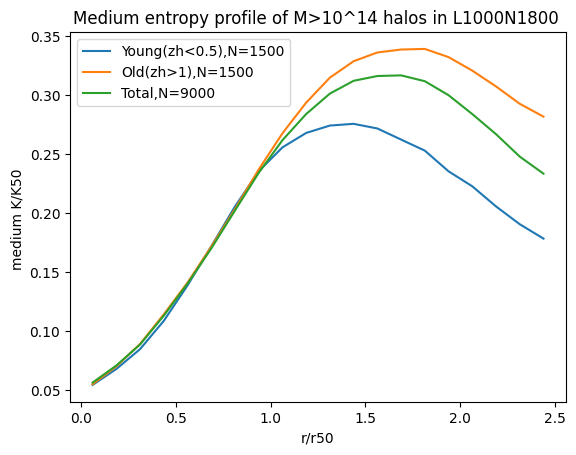

In [10]:
bins=np.linspace(0,2,21)
hg_s=np.sum(hg_S*hg,axis=2)/np.sum(hg,axis=2)
#hist=np.sum(hg_s[(zh>0)*(zh<0.5)],axis=2)#*8.56/(np.sum(hdm[(zh>0)*(zh<0.3)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh<0.3)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hg_s[(zh>=0)*(zh<0.5)],[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Young(zh<0.5),N=1500')
#hist=np.sum(hg_s[(zh>0)*(zh>1)],axis=2)#*8.56/(np.sum(hdm[(zh>0)*(zh>1.2)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh>1.2)],axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hg_s[(zh>=0)*(zh>1)],[25,50,75],axis=0)
ax.plot(bin,per[1],label='Old(zh>1),N=1500')
#hist=np.sum(hg_s[(zh>0)],axis=2)#*8.56/(np.sum(hdm[(zh>0)*(zh>1.2)],axis=2)*45.2+np.sum(hg[(zh>0)*(zh>1.2)],axis=2)*8.56)/(0.0494/0.316)
print(len(zh[(zh>0)*(zh<0.5)]),len(zh[(zh>0)*(zh>1)]))
per=np.percentile(hg_s[zh>=0],[25,50,75],axis=0)
ax.plot(bin,per[1],label='Total,N=9000')
#for i in range(10):
#    ax.plot(bin,hg_s[i],alpha=0.3,color='gray')
ax.legend()
ax.set_xlabel('r/r50')
ax.set_ylabel('medium K/K50 ')
ax.set_title('Medium entropy profile of M>10^14 halos in L1000N1800 ')

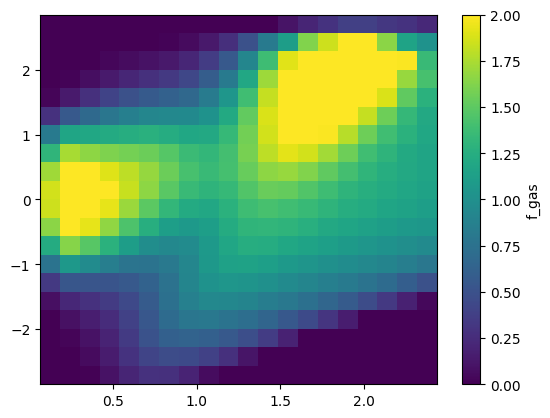

In [2]:
plt.figure()
plt.imshow(v_ad_m.T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,vmax=2,aspect='auto')
plt.colorbar(label='f_gas')

561097256.0 681800444.0


Text(0.5, 1.0, 'Gas Number Density Profile(Histogram/4pi r^2 dr, Medium of all halos)')

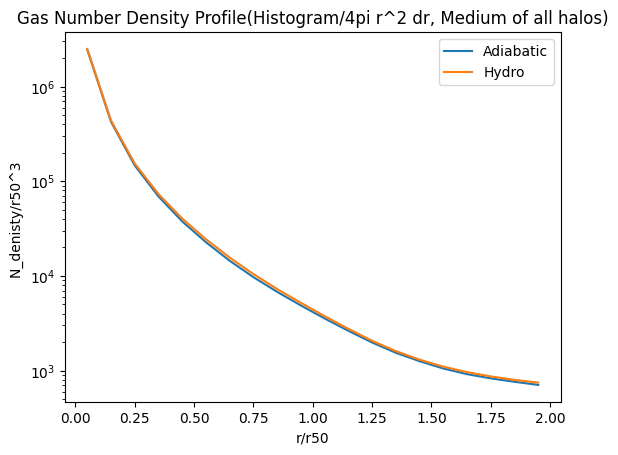

In [133]:
bins=np.linspace(0,2,21)
hist=np.sum(hdm_ad,axis=2)#*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)
#ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')
ax.plot(bin,per[1]/(bins[1:]**3-bins[:-1]**3)/(bins[1]-bins[0])/4/np.pi,label='Adiabatic')
hist=np.sum(hdm,axis=2)#*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
#ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1]/(bins[1:]**3-bins[:-1]**3)/(bins[1]-bins[0])/4/np.pi,label='Hydro')
ax.legend()
ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50')
ax.set_ylabel('N_denisty/r50^3 ')
ax.set_title('Gas Number Density Profile(Histogram/4pi r^2 dr, Medium of all halos)')


[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95] [0.69494538 0.95473801 1.03237998 1.05764432 1.06190991 1.0565352
 1.04646336 1.03409461 1.02067953 1.00689987 0.99313687 0.97960522
 0.96642379 0.95365502 0.94132743 0.92944906 0.9180156  0.9070154
 0.89643264 0.88624928]


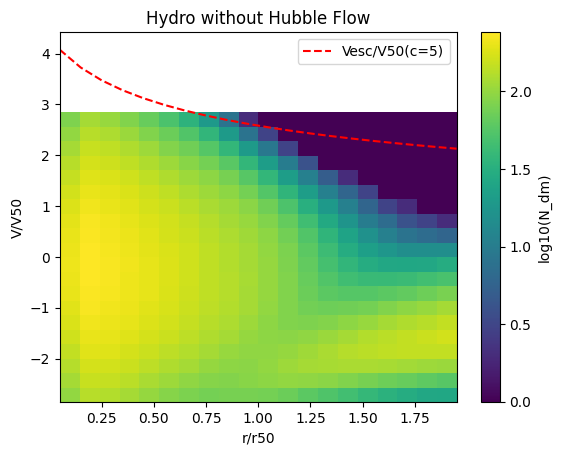

In [96]:
def F(x):
    return np.log(1+x)-x/(1+x)
dm=np.percentile(hdm,50,axis=0)#-np.percentile(f,25,axis=0)
dm_ad=np.percentile(hdm_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(dm).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,aspect='auto')
plt.colorbar(label='log10(N_dm)')
print(bin,np.sqrt(F(5*bin)/F(5)/bin))
plt.xlabel('r/r50')
plt.ylabel('V/V50')
plt.title("Hydro without Hubble Flow")
plt.plot(bin,1.93*np.sqrt(np.log(1+bin*5)/bin),'r--',label='Vesc/V50(c=5)')#escrape velocity
plt.legend()
#plt.plot(bin,np.sqrt(F(5*bin)/F(5)/bin),'r--',label='Vcir/V50(c=5)')#escrape velocity

[0.000e+00 1.000e+00 1.000e+00 8.700e+01 2.930e+02 4.880e+02 1.065e+03
 2.280e+03 3.841e+03 5.504e+03 8.209e+03 6.336e+03 2.997e+03 1.145e+03
 2.160e+02 1.200e+01 3.000e+00 0.000e+00 1.000e+00 0.000e+00]


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_17969/2071565565.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,vmax=3,aspect='auto')


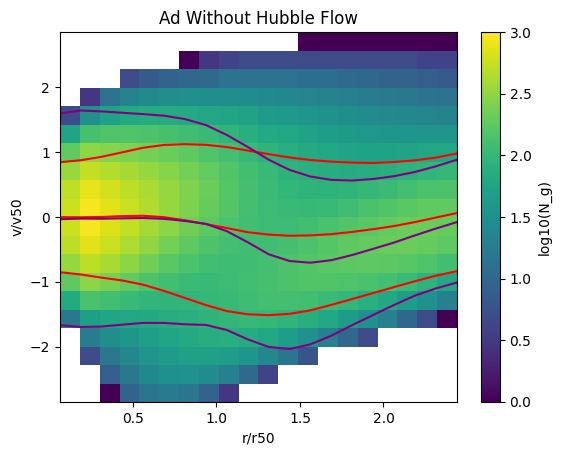

In [68]:
v_mean=np.zeros((len(hg_ad),len(hg_ad[0])))
v_sigma=np.zeros((len(hg_ad),len(hg_ad[0])))
v_mean_dm=np.zeros((len(hg_ad),len(hg_ad[0])))
v_sigma_dm=np.zeros((len(hg_ad),len(hg_ad[0])))

for i in range(len(hg_ad)):
    v_mean[i]=np.sum(hg_ad[i]*binv,axis=1)/np.sum(hg_ad[i],axis=1)
    v_sigma[i]=np.sqrt(np.sum(hg_ad[i]*(binv - v_mean[i])**2,axis=1)/np.sum(hg_ad[i],axis=1))
    v_mean_dm[i]=np.sum(hdm_ad[i]*binv,axis=1)/np.sum(hdm_ad[i],axis=1)
    v_sigma_dm[i]=np.sqrt(np.sum(hdm_ad[i]*(binv - v_mean[i])**2,axis=1)/np.sum(hdm_ad[i],axis=1))
g=np.percentile(hg_ad,50,axis=0)#-np.percentile(f,25,axis=0)
g_ad=np.percentile(hg_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,vmax=3,aspect='auto')
plt.colorbar(label='log10(N_g)')
plt.plot(bin,np.median(v_mean,axis=0),'r')
plt.plot(bin,np.median(v_mean+v_sigma,axis=0),'r')
plt.plot(bin,np.median(v_mean-v_sigma,axis=0),'r')
plt.plot(bin,np.median(v_mean_dm,axis=0),color="purple")
plt.plot(bin,np.median(v_mean_dm+v_sigma_dm,axis=0),color="purple")
plt.plot(bin,np.median(v_mean_dm-v_sigma_dm,axis=0),color="purple")
plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Ad Without Hubble Flow')
print(hg[0][0])

[  0.   0.   0.   0.   0.   5.   6.  48.  36.  56. 109.  53.  54.  24.
   0.   0.   3.   0.   0.   0.]


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1845/686451906.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,vmax=3,aspect='auto')


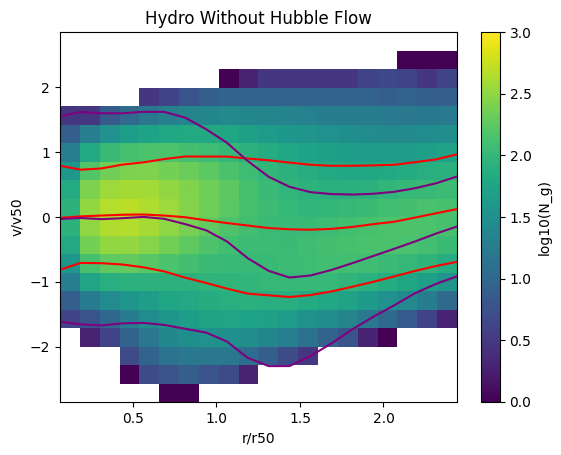

In [ ]:

v_mean=np.zeros((len(hg),len(hg[0])))
v_sigma=np.zeros((len(hg),len(hg[0])))
v_mean_dm=np.zeros((len(hg),len(hg[0])))
v_sigma_dm=np.zeros((len(hg),len(hg[0])))

for i in range(len(hg)):
    v_mean[i]=np.sum(hg[i]*binv,axis=1)/np.sum(hg[i],axis=1)
    v_sigma[i]=np.sqrt(np.sum(hg[i]*(binv - v_mean[i])**2,axis=1)/np.sum(hg[i],axis=1))
    v_mean_dm[i]=np.sum(hdm[i]*binv,axis=1)/np.sum(hdm[i],axis=1)
    v_sigma_dm[i]=np.sqrt(np.sum(hdm[i]*(binv - v_mean[i])**2,axis=1)/np.sum(hdm[i],axis=1))
g=np.percentile(hg,50,axis=0)#-np.percentile(f,25,axis=0)
g_ad=np.percentile(hg_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,vmax=3,aspect='auto')
plt.colorbar(label='log10(N_g)')
plt.plot(bin,np.median(v_mean,axis=0),'r')
plt.plot(bin,np.median(v_mean+v_sigma,axis=0),'r')
plt.plot(bin,np.median(v_mean-v_sigma,axis=0),'r')
plt.plot(bin,np.median(v_mean_dm,axis=0),color="purple")
plt.plot(bin,np.median(v_mean_dm+v_sigma_dm,axis=0),color="purple")
plt.plot(bin,np.median(v_mean_dm-v_sigma_dm,axis=0),color="purple")
plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Hydro Without Hubble Flow')
print(hg[0][0])

[  0.           0.           3.57714521   7.15429042  26.57307871
  59.27840636 100.67108667 118.55681273 125.71110315 113.95762603
 121.62293719 114.97966751  89.93965103  51.6130952   39.34859733
   9.1983734    8.17633191   0.           0.           0.        ] [1.1550e+02 4.0350e+02 1.3010e+03 2.4920e+03 3.0030e+03 3.1665e+03
 3.0780e+03 3.2975e+03 2.8120e+03 2.2975e+03 1.4530e+03 7.8100e+02
 5.9200e+02 4.3850e+02 2.6450e+02 1.8300e+02 1.4350e+02 5.2500e+01
 2.5000e+00 0.0000e+00]


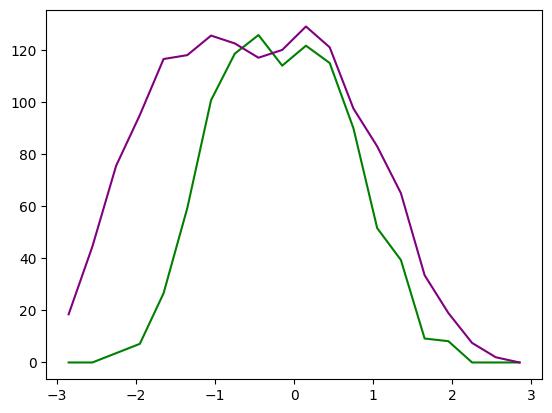

In [39]:

per=np.median(hg[9000:10000][11]*8.56/45.2*(1/(0.0494/0.316)-1),axis=0)
fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(binv,per,'g')
ax.plot(binv,np.median(hdm[9000:10000][11],axis=0),color="purple")
print(per,np.median(hdm[:][1],axis=0))
#even inside the halos, there are more outflow gas than DM

In [1]:
bins=np.linspace(0,2,21)
hist=np.sum(hg_S_ad[(zh_ad>0)*(zh_ad>1.3)],axis=2)#*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)
print(np.min(zh),np.max(zh))
per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)
print(hist[0])
ax.plot(bin,hist[5],label='Adiabatic')
hist=np.sum(hg_S[(zh>0)*(zh>1.3)],axis=2)#*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1],label='Hydro')
ax.legend()
ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50')
ax.set_ylabel('medium T ')
#ax.set_title('Gas Number Density Profile(Histogram/4pi r^2 dr, Medium of all halos)')


NameError: name 'np' is not defined

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_17969/3423345570.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=-3,aspect='auto')


Text(0.5, 1.0, 'Hydro With Hubble Flow')

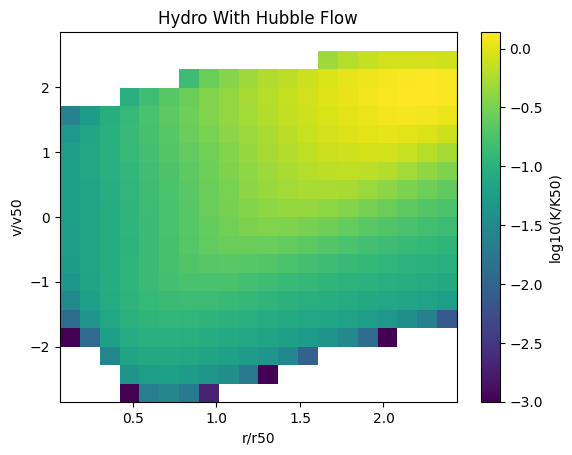

In [ ]:
g=np.percentile(hg_S,50,axis=0)#-np.percentile(f,25,axis=0)
g_ad=np.percentile(hg_S_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=-3,aspect='auto')
plt.colorbar(label='log10(K/K50)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Hydro With Hubble Flow')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_17969/104904177.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')


Text(0.5, 1.0, 'Hydro With Hubble Flow')

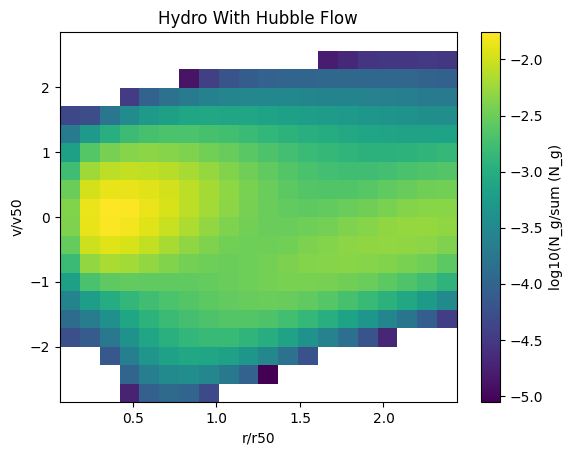

In [ ]:

g=np.percentile(hg,50,axis=0)#-np.percentile(f,25,axis=0)
g_ad=np.percentile(hg_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='log10(N_g/sum (N_g)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Hydro With Hubble Flow')

561097256.0 681800444.0


Text(0, 0.5, 'medium Lx ')

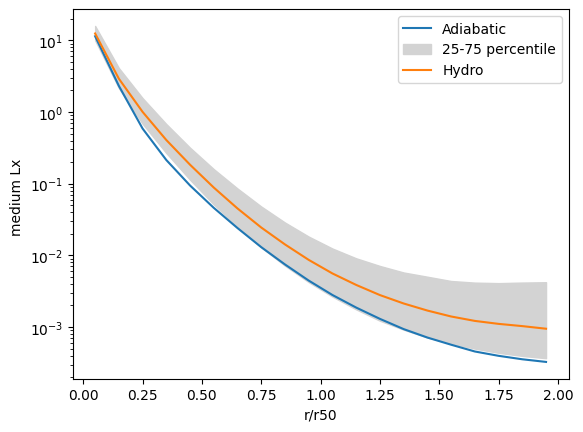

In [8]:
bins=np.linspace(0,2,21)
hist=np.sum(hg_X_ad,axis=2)#*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Adiabatic')
hist=np.sum(hg_X,axis=2)#*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')

ax.plot(bin,per[1],label='Hydro')
ax.legend()
ax.set_yscale('log')
print(np.sum(hg),np.sum(hg_ad))
ax.set_xlabel('r/r50')
ax.set_ylabel('medium Lx ')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_11720/1386410987.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=-1.25,vmax=-0.5,aspect='auto')


Text(0.5, 1.0, 'Hydro With Hubble Flow')

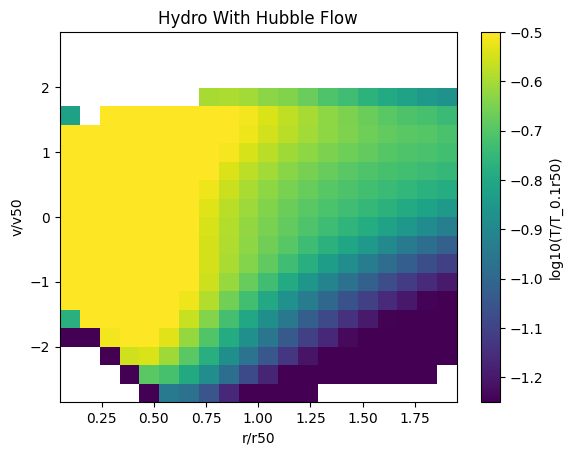

In [23]:
g=np.percentile(hg_T,50,axis=0)#-np.percentile(f,25,axis=0)
g_ad=np.percentile(hg_T_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(g).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=-1.25,vmax=-0.5,aspect='auto')
plt.colorbar(label='log10(T/T_0.1r50)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Hydro With Hubble Flow')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_11720/393196561.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(g_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')


Text(0.5, 1.0, 'Ad With Hubble Flow')

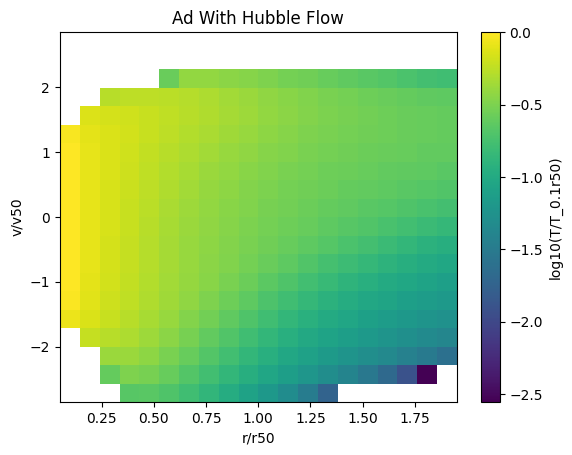

In [20]:
plt.imshow(np.log10(g_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='log10(T/T_0.1r50)')
plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Ad With Hubble Flow')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_11720/3846587611.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(gx).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')


Text(0.5, 1.0, 'Hydro With Hubble Flow')

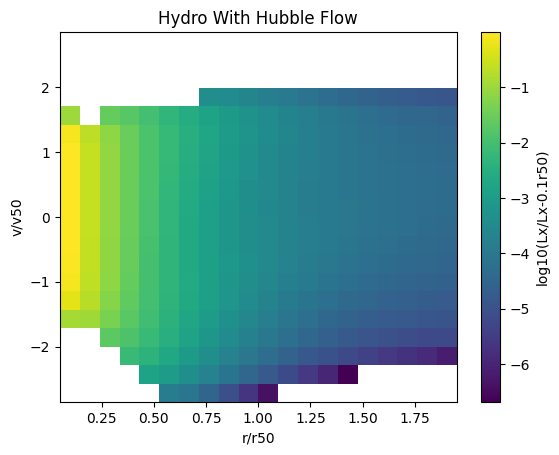

In [19]:
gx=np.percentile(hg_X,50,axis=0)#-np.percentile(f,25,axis=0)
gx_ad=np.percentile(hg_X_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(gx).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='log10(Lx/Lx-0.1r50)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Hydro With Hubble Flow')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_11720/2038386310.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(gx_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')


Text(0.5, 1.0, 'Ad With Hubble Flow')

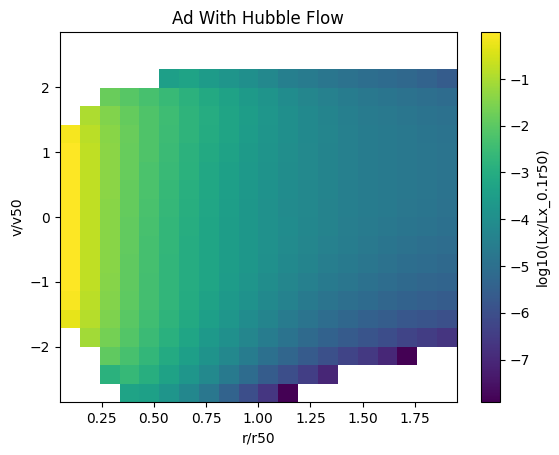

In [21]:
gx=np.percentile(hg_X,50,axis=0)#-np.percentile(f,25,axis=0)
gx_ad=np.percentile(hg_X_ad,50,axis=0)#-np.percentile(f_ad,25,axis=0)
plt.figure()

plt.imshow(np.log10(gx_ad).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='log10(Lx/Lx_0.1r50)')

plt.xlabel('r/r50')
plt.ylabel('v/v50')
plt.title('Ad With Hubble Flow')

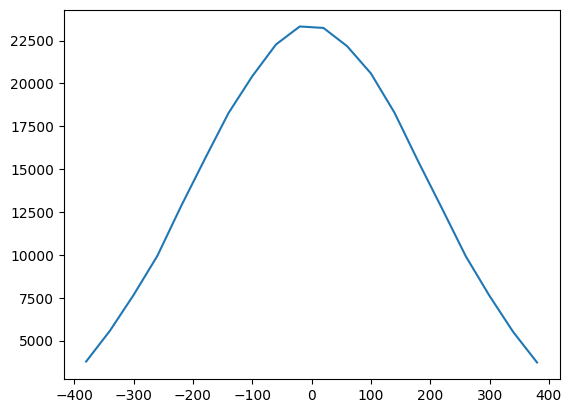

In [14]:
x=np.random.rand(557131)*2
y=np.random.rand(557131)*2
z=np.random.rand(557131)*2
r=np.sqrt(x**2+y**2+z**2)
vx=np.random.normal(loc=0,scale=200,size=557131)

vy=np.random.normal(loc=0,scale=200,size=557131)
vz=np.random.normal(loc=0,scale=200,size=557131)
v=np.sum(np.array([vx,vy,vz])*np.array([x,y,z]),axis=0)/r
bins=np.linspace(0,2,21)

binsv=np.linspace(-400,400,21)
h=np.histogram2d(r,v,bins=[bins,binsv])[0]
hist=np.sum(h,axis=0)
plt.figure()
plt.plot(binv,hist)
#plt.colorbar(label='N')

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_49354/4225128078.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(v_m_lowZ).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,aspect='auto',)


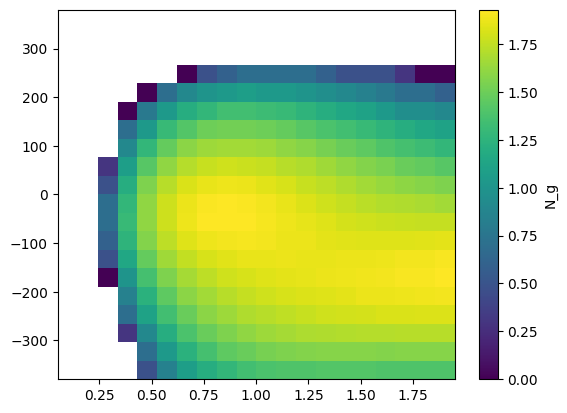

In [48]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/2d_fgas_lowZ.hdf5",'r')
bin=np.array(f['bin'])
binv=np.array(f['binv'])
hg_lowZ=np.array(f['Ng'])
f.close()




v_m_lowZ=np.percentile(hg_lowZ,50,axis=0)

plt.figure()
plt.imshow(np.log10(v_m_lowZ).T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],vmin=0,aspect='auto',)
plt.colorbar(label='N_g')